<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/ejemplo/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD NACIONAL DE COLOMBIA**

**PARCIAL 2**

INTEGRANTES:

LUIS FERNANDO CASTRO BUCHELLY

WILLIAM CAMILO OBANDO CARDENAS

#Punto 1


---



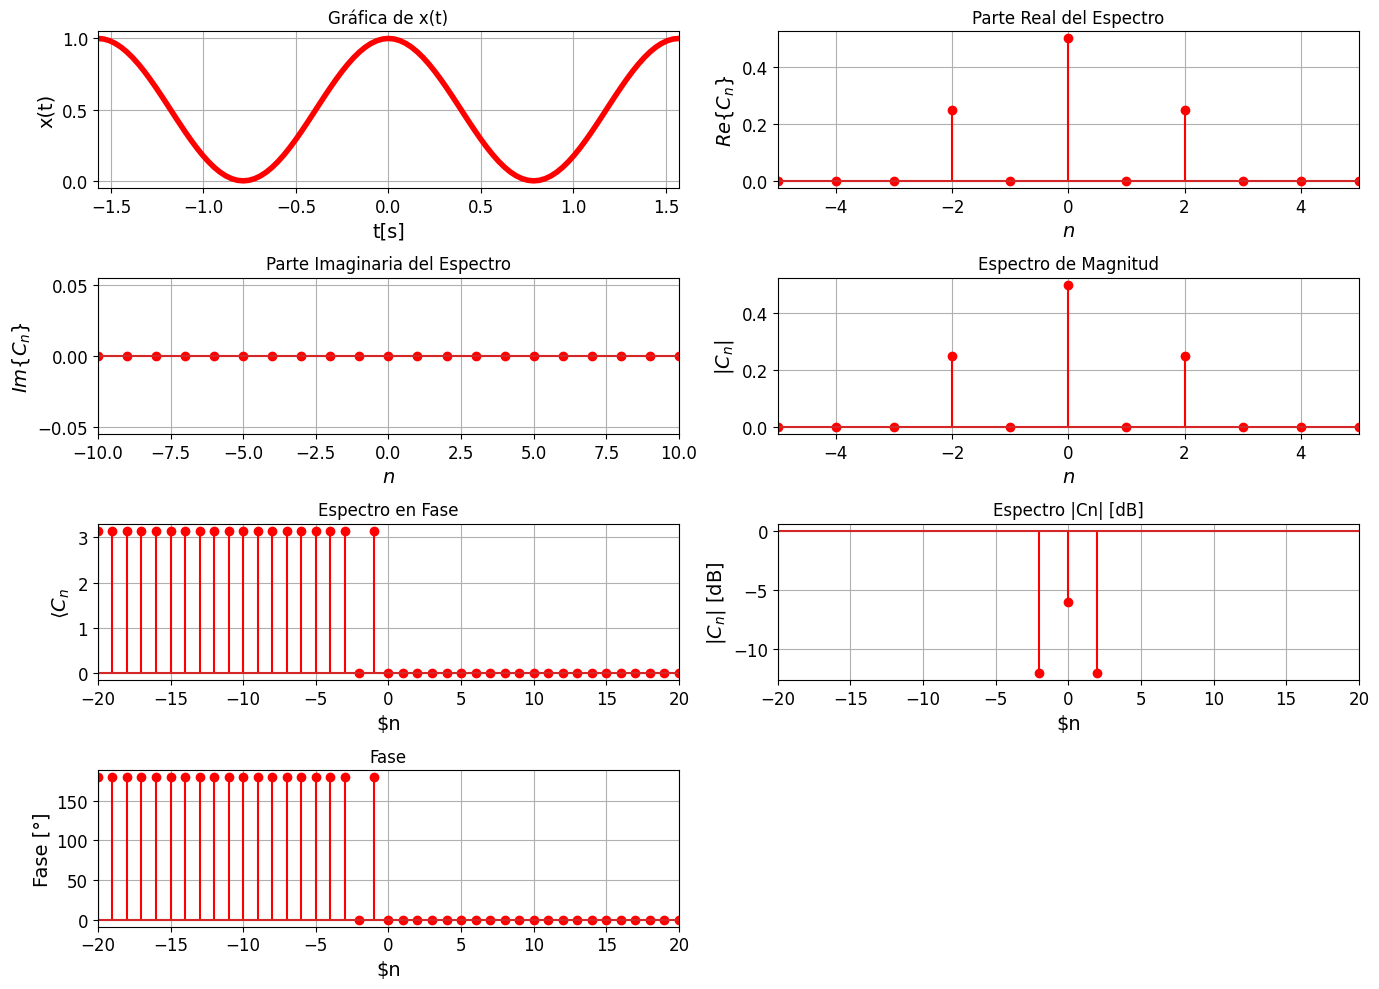

In [ ]:
# Punto 1

# Para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

To = np.pi # periodo definido
Fo = 1/To
A = 1 # amplitud de la señal
F0 = 1/To  # Frecuencia fundamental (puedes ajustarla)
Fs = Fo*100 # frecuencia de muestreo definida

# Intervalo de tiempo basado en F0
tv = np.arange(-To/2, To/2, 1/Fs)
Nm = len(tv) #numero de muestras requeridas
# Calcular la señal x(t)
xo = (A**2)/2 + (A**2 * np.cos(4 * np.pi * F0 * tv))/2

# Graficar señal original
plt.figure(figsize=(14, 10))  # Ajustar tamaño de la figura
plt.subplot(4, 2, 1)  # Dividir la figura en 3 filas, 2 columnas, y seleccionar la primera
plt.plot(tv, xo, 'r', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.title("Gráfica de x(t)")
plt.xlim([-1/(2*F0), 1/(2*F0)])  # Limitar el eje x al intervalo deseado


# Calcular y graficar el espectro de Fourier
N = 50  # Número de armónicos a considerar
wo = 2*np.pi/To # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
# Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv) # Cambiar según la señal
Cn = 0*nv  # Inicializar Cn con ceros
Cn[N] = (A**2)/2  # Componente DC (a0)
Cn[N + 2] = (A**2)/4  # Componente correspondiente a cos(4*pi*F0*t) (an/2)
Cn[N - 2] = (A**2)/4  # Componente correspondiente a cos(-4*pi*F0*t) (an/2)

plt.subplot(4, 2, 2)  # Seleccionar la segunda sub-figura
plt.stem(nv, np.real(Cn), 'r')# Parte real del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Parte Real del Espectro")
plt.xlim(-5, 5)

plt.subplot(4, 2, 3)  # Seleccionar la tercera sub-figura
plt.stem(nv, np.imag(Cn), 'r')# Parte imaginaria del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Parte Imaginaria del Espectro")
plt.xlim(-10, 10)

plt.subplot(4, 2, 4)  # Seleccionar la cuarta sub-figura
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Espectro de Magnitud")
plt.xlim(-5, 5)

plt.subplot(4,2,5)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.title("Espectro en Fase")
plt.xlim(-20, 20)

# Espectro de Magnitud en dB
plt.subplot(4, 2, 6)
plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')
plt.xlabel(r'$n', fontsize=14)
plt.ylabel(r'$|C_n|$ [dB]', fontsize=14)
plt.grid()
plt.axis('tight')
plt.title("Espectro |Cn| [dB]")
plt.xlim(-20, 20)

plt.subplot(4, 2, 7)
plt.stem(nv, np.angle(Cn, deg=True), 'r')
plt.xlabel(r'$n', fontsize=14)
plt.ylabel(r'Fase [°]', fontsize=14)
plt.grid()
plt.axis('tight')
plt.title("Fase")
plt.xlim(-20, 20)




plt.tight_layout()
plt.show()



In [ ]:
from ipywidgets import interact,IntSlider
Px = 3/8 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',marker='o', markersize=3, label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

#PUNTO 2:


In [1]:
# Instalamos las librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import yt_dlp as youtube_dl
import subprocess
import os

     / 2.7 MB 12.4 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2930265 sha256=9a2fedc31e44d384ef0dde038700461da30cfe3b94c1c5516f4638ca604beb9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-x4we5jiw/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [2]:
# Definimos la funcion de descarga del video
def descarga(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

In [6]:
# Elimina los archivos antiguos si existen
if os.path.exists('Cancion.mp3'):
    os.remove('Cancion.mp3')
if os.path.exists('Cancion.wav'):
    os.remove('Cancion.wav')
#  Ingreso de la cancion y toma de la muestra
CAC = input("Ingrese el link de su cancion : ")
descarga(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

plc = np.array([20])    # El punto de lectura de la canción ingresada será en 20 segundos
tm = 5    #segundos de muestra
fs = 48000    #frecuencia de muestreo de un video en youtube
Fc = 2400/np.pi
t = np.arange(0,5,1/fs)   #vector de tiempo
XC = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  XC[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 5s de la cancion ingresada

M = XC[0,:,0]

Ingrese el link de su cancion : https://www.youtube.com/watch?v=GIJaIMTzsqI
[youtube] Extracting URL: https://www.youtube.com/watch?v=GIJaIMTzsqI
[youtube] GIJaIMTzsqI: Downloading webpage
[youtube] GIJaIMTzsqI: Downloading tv client config
[youtube] GIJaIMTzsqI: Downloading player 9c6dfc4a
[youtube] GIJaIMTzsqI: Downloading tv player API JSON
[youtube] GIJaIMTzsqI: Downloading ios player API JSON
[youtube] GIJaIMTzsqI: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=GIJaIMTzsqI
[youtube] GIJaIMTzsqI: Downloading webpage
[youtube] GIJaIMTzsqI: Downloading tv client config
[youtube] GIJaIMTzsqI: Downloading player 9c6dfc4a
[youtube] GIJaIMTzsqI: Downloading tv player API JSON
[youtube] GIJaIMTzsqI: Downloading ios player API JSON
[youtube] GIJaIMTzsqI: Downloading m3u8 information
[info] GIJaIMTzsqI: Downloading 1 format(s): 251
[download] Destination: Cancion.mp3
[download] 100% of    3.69MiB in 00:00:00 at 8.73MiB/s   


In [7]:
#  Definicion señal portadora
Ac = float(max(abs(M)))    #considerando Im=1
C = Ac*np.cos(2*np.pi*Fc*t) #señal portadora

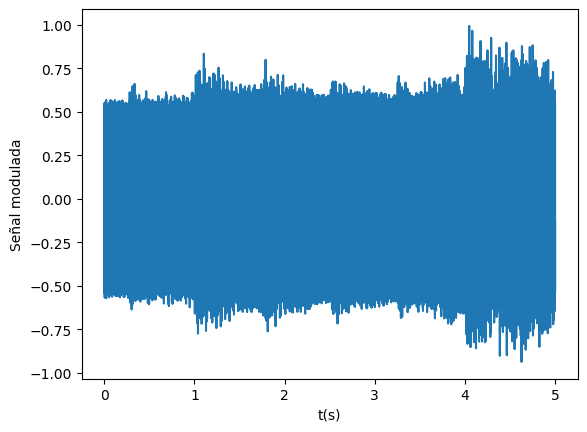

In [8]:
#  Modulacion de la señal
Y = (1+M/Ac)*C

plt.plot(t,Y)
plt.xlabel('t(s)')
plt.ylabel('Señal modulada')
plt.show()


In [9]:
#  Transformadas de Fourier de las señales

VF = np.fft.rfftfreq(len(C),1/fs)    #vector de frecuencias
TE = np.fft.rfft(M)    #transformada de la entrada
TP = np.fft.rfft(C)    #transformada portadora
TM = np.fft.rfft(Y)   #transformada modulacion

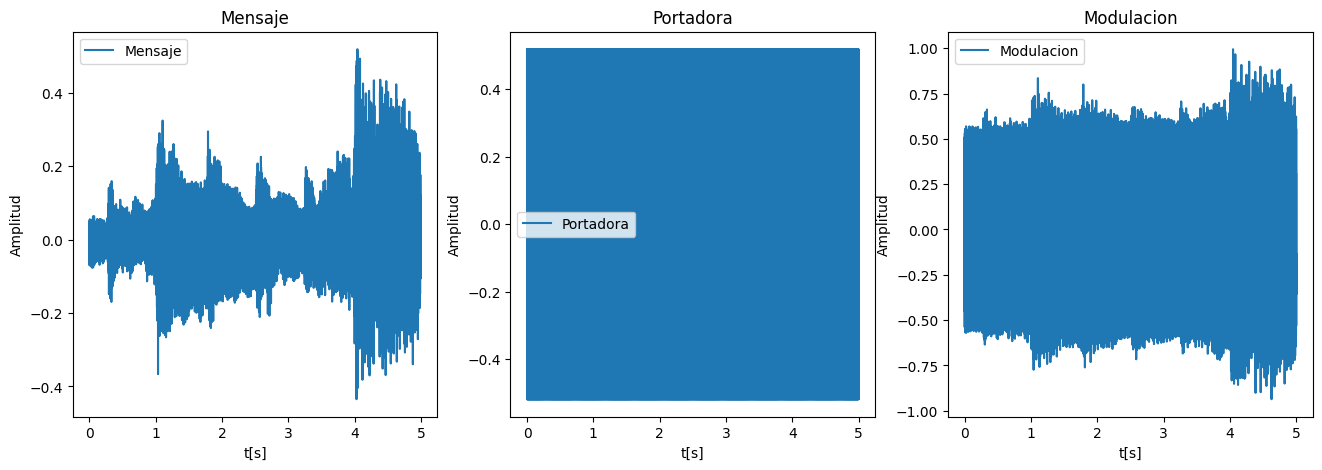

In [10]:
#  Gráficas en el tiempo

plt.figure(figsize=(16,5))

plt.subplot(131)
plt.title('Mensaje')
plt.plot(t,M,label='Mensaje')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(132)
plt.title('Portadora')
plt.plot(t,C,label='Portadora')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(133)
plt.title('Modulacion')
plt.plot(t,Y,label='Modulacion')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()

plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


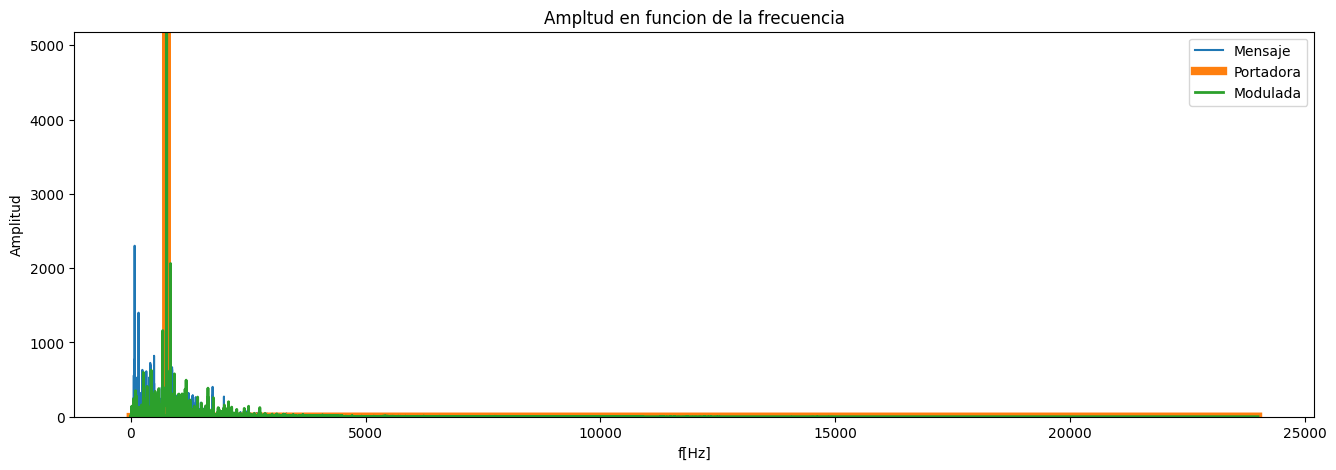

In [11]:
# Gráficas en la frecuencia

plt.figure(figsize=(16,5))
plt.ylim([min(abs(M)), 10000*max(abs(M))])
plt.plot(VF,TE,label='Mensaje')
plt.plot(VF,TP,label='Portadora',linewidth=6)
plt.plot(VF,TM,label='Modulada',linewidth=2)
plt.title('Ampltud en funcion de la frecuencia')
plt.xlabel('f[Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [12]:
Audio(M.T,rate=fs)

In [14]:
Audio(C,rate=fs)

In [13]:
Audio(Y,rate=fs)

#PUNTO 3:


**Distorsión Total de Armónicos (THD)**:

El THD es una medida de la distorsión armónica presente en una señal y se define como la relación entre la suma de las potencias de todos los componentes armónicos y la potencia del componente fundamental. Para una señal de corriente o tensión, el THD se calcula como:
$$THD = \frac{\sqrt{V_2^2+V_3^2+\cdots V_n^2}}{V_1}$$


donde Vn es la amplitud del n-ésimo armónico y V1 es la amplitud del componente fundamental.
El THD indica qué tan alejada está una señal de una senoidal pura. Un THD alto significa más distorsión.


**Cálculo del THD usando la FFT**

Podemos calcular el THD aplicando la Transformada Rápida de Fourier (FFT) a la señal de salida del rectificador. Los pasos básicos son:

1.   Aplica la Transformada Rápida de Fourier (FFT) a la señal para obtener su
espectro de frecuencia.
2.   Identifica la amplitud de la frecuencia fundamental (V1) y las amplitudes de los armónicos (V1,V2,V3,...).


3. Usa la fórmula del THD para calcular la distorsión.


**Factor de Potencia**:

El factor de potencia (PF) es la relación entre la potencia activa (P) y la potencia aparente (S) en un circuito. Se define como:
$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$


En presencia de armónicos, el factor de potencia puede verse afectado por la distorsión armónica, lo que lleva a un factor de potencia de desplazamiento (DPF) y un factor de potencia de distorsión (DF). Un THD alto reduce el FP, lo que afecta la eficiencia del sistema


THD de la señal rectificada: 0.3418


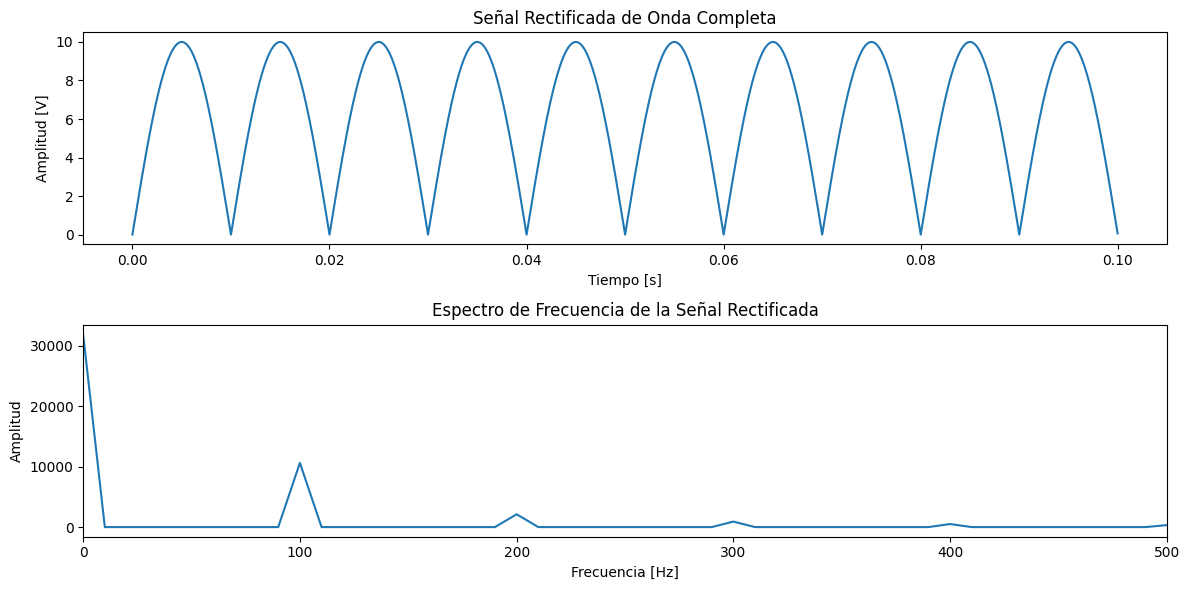

THD de la señal con carga RC: 0.1710


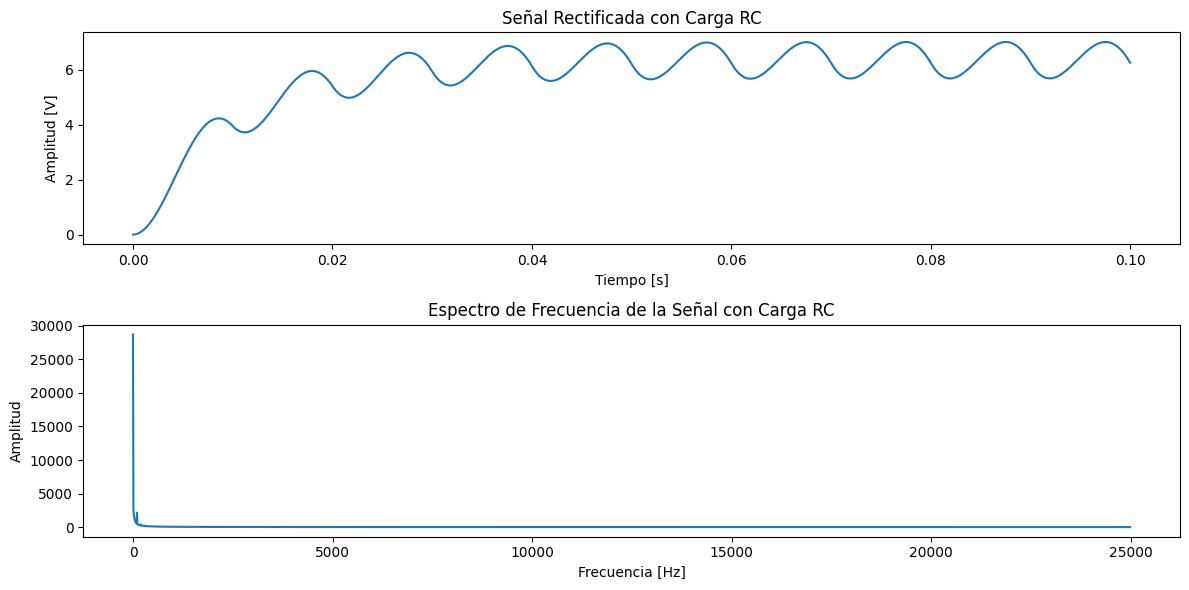

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
frecuencia_fundamental = 50  # Hz
amplitud_fundamental = 10.0   # V
muestras_por_ciclo = 1000
num_ciclos = 5
tiempo = np.linspace(0, num_ciclos / frecuencia_fundamental, num_ciclos * muestras_por_ciclo, endpoint=False)

# Generar señal de entrada sinusoidal
senal_fundamental = amplitud_fundamental * np.sin(2 * np.pi * frecuencia_fundamental * tiempo)

# Rectificador de onda completa
senal_rectificada = np.abs(senal_fundamental)

# Función para calcular THD
def calcular_thd(senal, frecuencia_fundamental, muestras_por_ciclo):
    fft_resultado = np.fft.fft(senal)
    frecuencias = np.fft.fftfreq(len(senal), d=1/(frecuencia_fundamental * muestras_por_ciclo))

    # Encontrar el índice de la frecuencia fundamental
    idx_fundamental = np.argmax(np.abs(fft_resultado[:len(fft_resultado)//2]))

    # Calcular la amplitud de los armónicos
    amplitud_fundamental = np.abs(fft_resultado[idx_fundamental])
    amplitudes_armonicos = np.abs(fft_resultado[:len(fft_resultado)//2])

    # Calcular THD
    thd = np.sqrt(np.sum(amplitudes_armonicos**2) - amplitud_fundamental**2) / amplitud_fundamental
    return thd

# Cálculo del THD para la señal rectificada
thd_rectificada = calcular_thd(senal_rectificada, frecuencia_fundamental, muestras_por_ciclo)
print(f"THD de la señal rectificada: {thd_rectificada:.4f}")

# Visualización de la señal rectificada y su espectro de frecuencia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, senal_rectificada)
plt.title('Señal Rectificada de Onda Completa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')

plt.subplot(2, 1, 2)
fft_resultado = np.fft.fft(senal_rectificada)
frecuencias = np.fft.fftfreq(len(senal_rectificada), d=1/(frecuencia_fundamental * muestras_por_ciclo))
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(fft_resultado[:len(fft_resultado)//2]))
plt.title('Espectro de Frecuencia de la Señal Rectificada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim(0,500)

plt.tight_layout()
plt.show()

# Simulación de carga RC
R = 100  # Ohm
C = 100e-6  # F
tau = R * C
senal_rc = np.zeros_like(tiempo)

for i in range(1, len(tiempo)):
    dt = tiempo[i] - tiempo[i-1]
    senal_rc[i] = senal_rc[i-1] + (senal_rectificada[i] - senal_rc[i-1]) * dt / tau

# Cálculo del THD para la carga RC
thd_rc = calcular_thd(senal_rc, frecuencia_fundamental, muestras_por_ciclo)
print(f"THD de la señal con carga RC: {thd_rc:.4f}")

# Visualización de la señal con carga RC y su espectro de frecuencia
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, senal_rc)
plt.title('Señal Rectificada con Carga RC')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')

plt.subplot(2, 1, 2)
fft_resultado_rc = np.fft.fft(senal_rc)
frecuencias_rc = np.fft.fftfreq(len(senal_rc), d=1/(frecuencia_fundamental * muestras_por_ciclo))
plt.plot(frecuencias_rc[:len(frecuencias_rc)//2], np.abs(fft_resultado_rc[:len(fft_resultado_rc)//2]))
plt.title('Espectro de Frecuencia de la Señal con Carga RC')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


# Punto 4

In [15]:
# Instalar dependencias necesarias
!pip install gdown pydub librosa scikit-learn numpy matplotlib soundfile

!apt-get install ffmpeg

import gdown
import librosa
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import os
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import soundfile as sf
from scipy.spatial.distance import cosine

# Diccionario con los ID de cada archivo (reemplaza ID_REAL_X con los ID correctos)
file_ids = {
    "clave1": "1WniR2Rd1KnoIAHhGmwh9k5WJoaepU4sJ",  # base de datos
    "clave2": "1J9jsg4G3duHX9OOwJxLuNuP016wjIc9b"
}


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


Descargando clave1.wav desde https://drive.google.com/uc?id=1WniR2Rd1KnoIAHhGmwh9k5WJoaepU4sJ...


Downloading...
From: https://drive.google.com/uc?id=1WniR2Rd1KnoIAHhGmwh9k5WJoaepU4sJ
To: /content/clave1.wav
100%|██████████| 5.99M/5.99M [00:00<00:00, 76.6MB/s]


Descargando clave2.wav desde https://drive.google.com/uc?id=1J9jsg4G3duHX9OOwJxLuNuP016wjIc9b...


Downloading...
From: https://drive.google.com/uc?id=1J9jsg4G3duHX9OOwJxLuNuP016wjIc9b
To: /content/clave2.wav
100%|██████████| 5.83M/5.83M [00:00<00:00, 33.3MB/s]


Audio clave1: Duración = 62.44 s, Tasa de muestreo = 48000 Hz


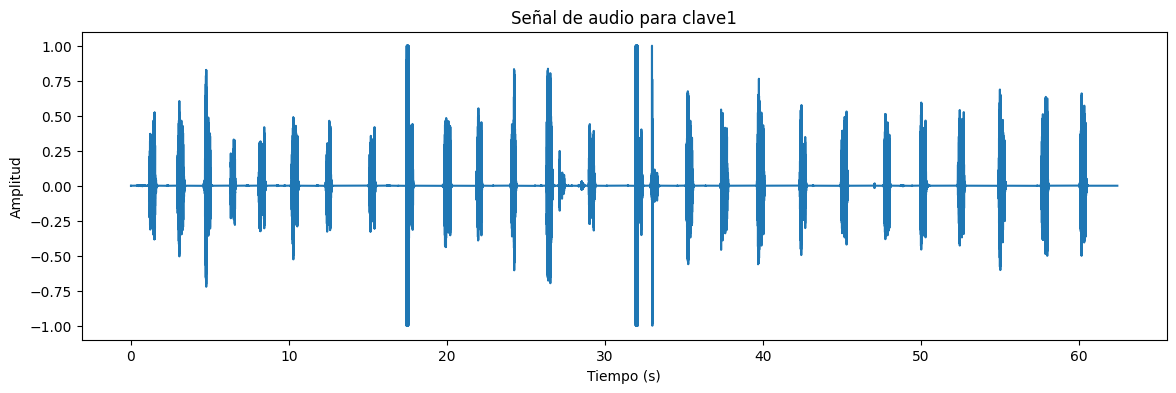

Audio clave2: Duración = 60.78 s, Tasa de muestreo = 48000 Hz


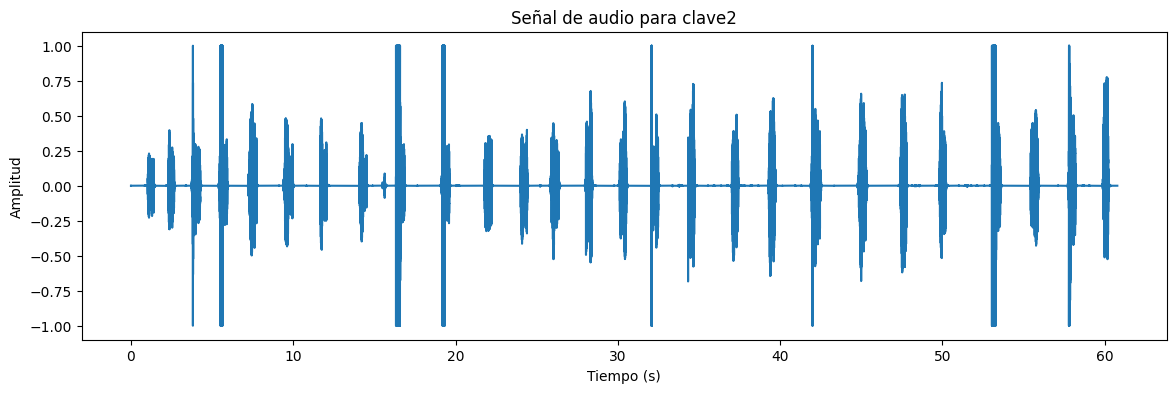

In [16]:
# Función para descargar un archivo desde Google Drive usando gdown
def descargar_audio(file_id, output_filename):
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Descargando {output_filename} desde {url}...")
    gdown.download(url, output_filename, quiet=False)

# Descargamos los audios (se asume que están en formato mp3; si son wav, cambia la extensión)
for key, file_id in file_ids.items():
    output_file = f"{key}.wav"
    descargar_audio(file_id, output_file)

# Cargamos y graficamos cada audio en el dominio del tiempo
for key in file_ids.keys():
    filename = f"{key}.wav"
    # Cargamos el audio; sr=None mantiene la tasa de muestreo original
    audio, sr = librosa.load(filename, sr=None)
    print(f"Audio {key}: Duración = {len(audio)/sr:.2f} s, Tasa de muestreo = {sr} Hz")

    # Creamos un eje temporal en segundos
    tiempo = np.linspace(0, len(audio)/sr, num=len(audio))

    # Graficamos la señal en el tiempo
    plt.figure(figsize=(14, 4))
    plt.plot(tiempo, audio)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Señal de audio para {key}")
    plt.show()

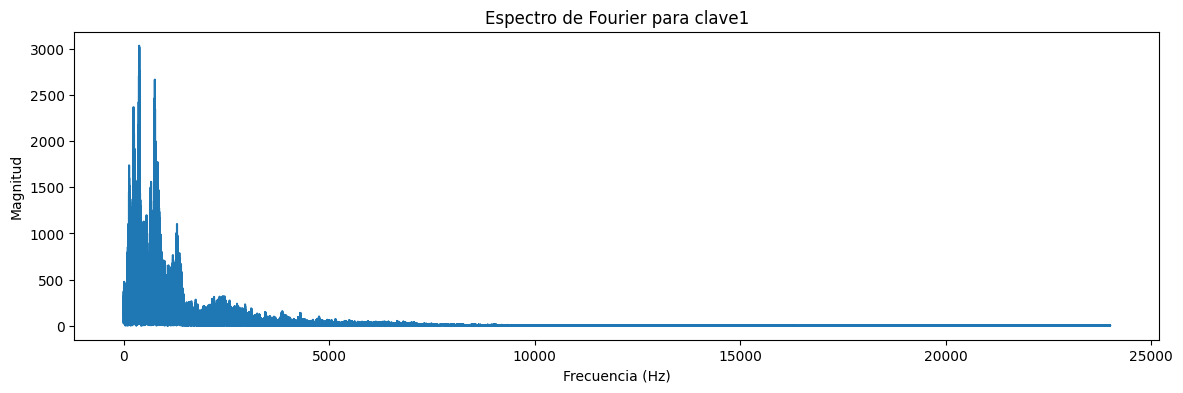

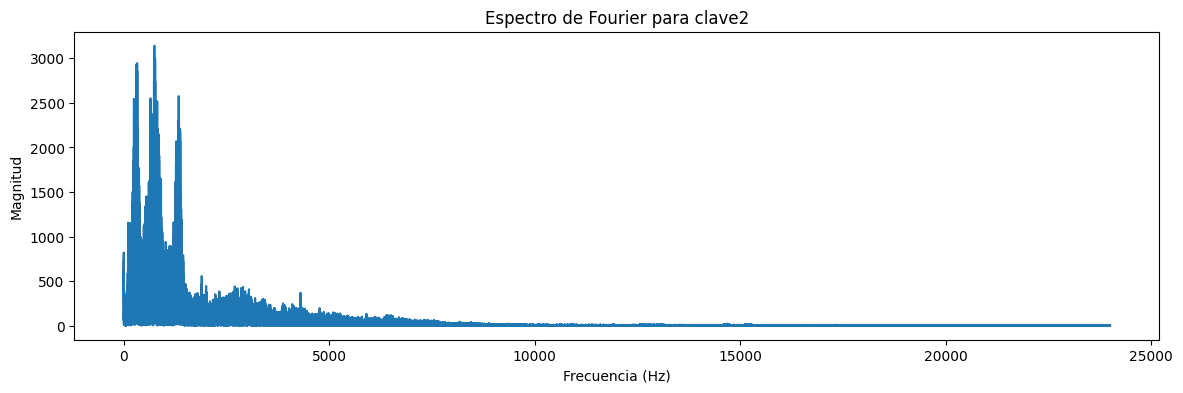

In [17]:
# Calcular y graficar la transformada de Fourier para cada audio
for key in file_ids.keys():
    filename = f"{key}.wav"
    # Cargar el audio (si ya lo tienes cargado, puedes omitir esta línea)
    audio, sr = librosa.load(filename, sr=None)

    # Calcular la FFT
    fft_audio = np.fft.fft(audio)

    # Solo necesitamos la mitad de los puntos (la parte positiva del espectro)
    fft_audio = np.abs(fft_audio[:len(fft_audio)//2])

    # Crear el eje de frecuencias
    freqs = np.linspace(0, sr/2, num=len(fft_audio))

    # Graficar el espectro de Fourier
    plt.figure(figsize=(14, 4))
    plt.plot(freqs, fft_audio)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.title(f"Espectro de Fourier para {key}")
    plt.show()

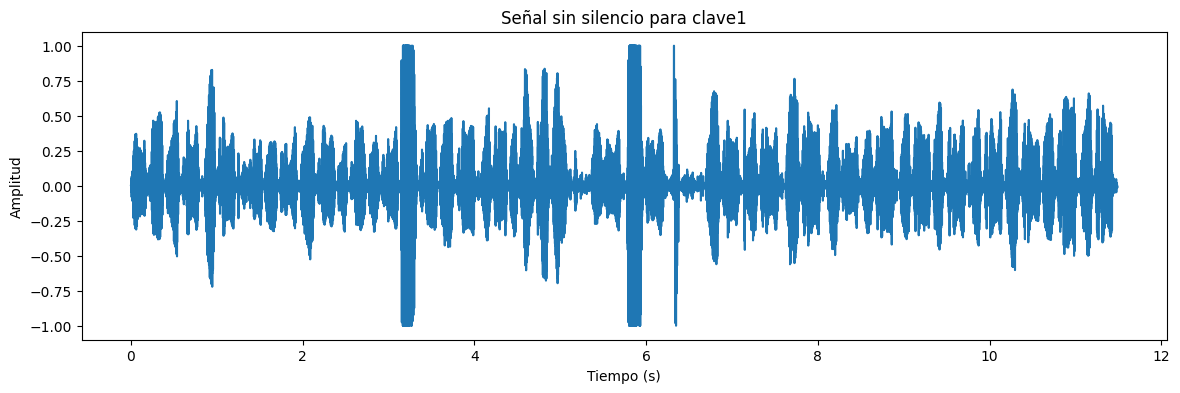

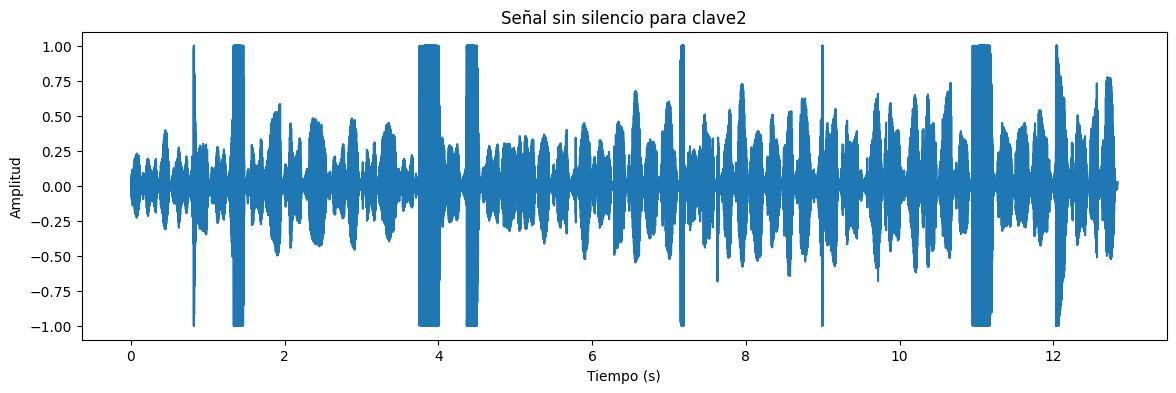

Señales sin silencio almacenadas: ['clave1', 'clave2']


In [18]:
import librosa
import librosa.effects
import numpy as np
import matplotlib.pyplot as plt

# Diccionario para almacenar las señales procesadas
signals_no_silence = {}

# Procesar cada audio: eliminar silencios y graficar la señal resultante sin silencios
for key in file_ids.keys():
    filename = f"{key}.wav"

    # Cargar el audio manteniendo su tasa de muestreo original
    audio, sr = librosa.load(filename, sr=None)

    # Detectar intervalos no silenciosos (ajusta top_db según sea necesario)
    intervals = librosa.effects.split(audio, top_db=35)

    # Concatenar las partes no silenciosas para formar una señal continua
    audio_no_silence = np.concatenate([audio[start:end] for start, end in intervals])

    # Almacenar la señal procesada en el diccionario junto con la tasa de muestreo
    signals_no_silence[key] = {
        "signal": audio_no_silence,
        "sampling_rate": sr
    }

    # Crear un eje de tiempo para la señal sin silencios
    tiempo_no_silence = np.linspace(0, len(audio_no_silence) / sr, num=len(audio_no_silence))

    # Graficar la señal sin silencios
    plt.figure(figsize=(14, 4))
    plt.plot(tiempo_no_silence, audio_no_silence)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Señal sin silencio para {key}")
    plt.show()

# Ahora, signals_no_silence contiene todas las señales procesadas para un uso posterior
print("Señales sin silencio almacenadas:", list(signals_no_silence.keys()))


In [19]:
from IPython.display import Audio

# Reproducir las señales sin silencios
for key in file_ids.keys():
    print(f"Reproduciendo la señal sin silencios para {key}")
    display(Audio(audio_no_silence, rate=sr))

Reproduciendo la señal sin silencios para clave1


Reproduciendo la señal sin silencios para clave2


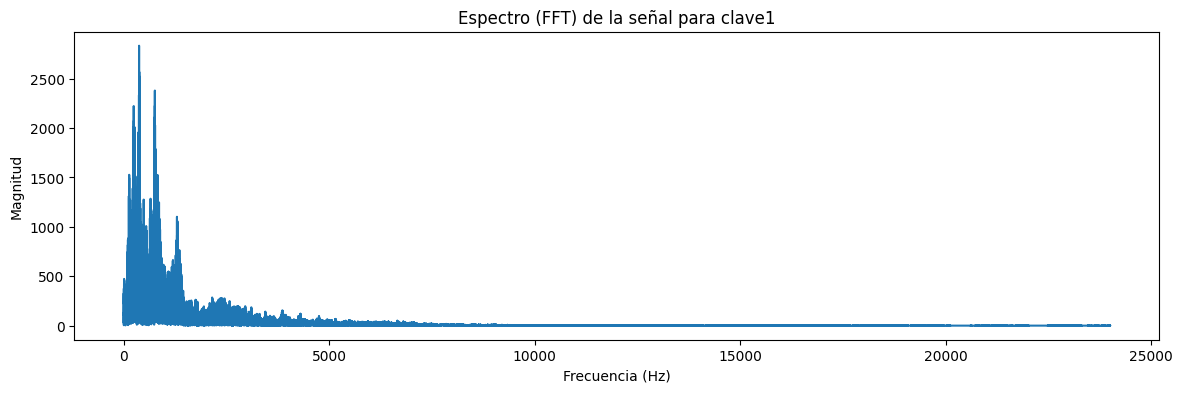

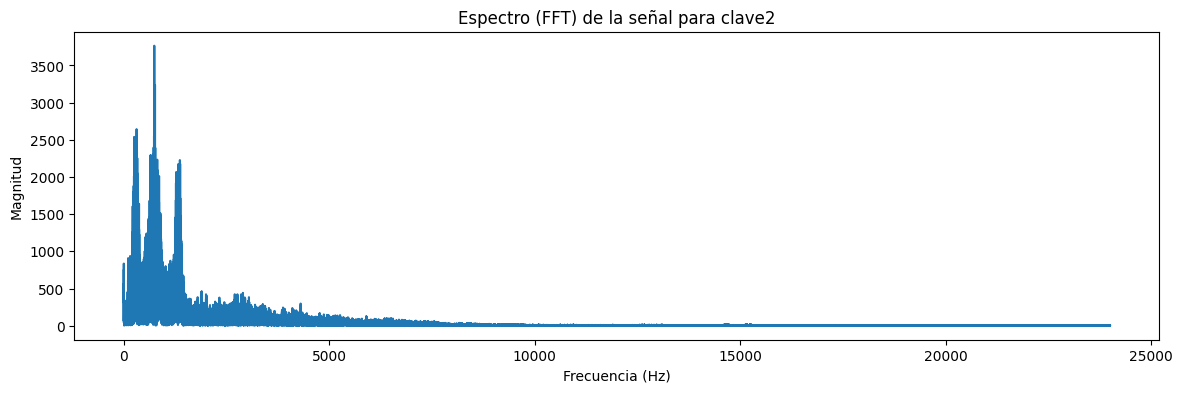

{'clave1': {'fft': array([-113.37145996  +0.j        ,  285.31384004 -45.89416754j,
         -245.89820821+177.72985593j, ...,  215.20022168 +88.83351128j,
         -245.89820821-177.72985593j,  285.31384004 +45.89416754j]),
  'frequencies': array([ 0.        ,  0.08704735,  0.17409471, ..., -0.26114206,
         -0.17409471, -0.08704735])},
 'clave2': {'fft': array([-743.93734741  +0.j        ,   72.8773018 +254.16928846j,
           93.62268522-473.29510243j, ..., -189.28079152 -41.23281008j,
           93.62268522+473.29510243j,   72.8773018 -254.16928846j]),
  'frequencies': array([ 0.        ,  0.07793017,  0.15586035, ..., -0.23379052,
         -0.15586035, -0.07793017])}}

In [20]:
fourier_signals = {}

# Iterar sobre cada señal almacenada en signals_no_silence
for key, data in signals_no_silence.items():
    # Extraemos la señal y la tasa de muestreo
    signal = data["signal"]
    sr = data["sampling_rate"]

    # Calcular la transformada de Fourier de la señal
    fft_signal = np.fft.fft(signal)

    # Calcular las frecuencias correspondientes a cada componente de la FFT
    freqs = np.fft.fftfreq(len(signal), d=1/sr)

    # Almacenar la transformada y las frecuencias en el diccionario fourier_signals
    fourier_signals[key] = {
        "fft": fft_signal,
        "frequencies": freqs
    }

    # Graficar el espectro de magnitud de la transformada de Fourier
    plt.figure(figsize=(14, 4))
    # Nos quedamos con la parte de frecuencias positivas para graficar
    idx_positive = np.where(freqs >= 0)
    plt.plot(freqs[idx_positive], np.abs(fft_signal)[idx_positive])
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.title(f"Espectro (FFT) de la señal para {key}")
    plt.show()

# fourier_signals ahora contiene la FFT y las frecuencias para cada señal procesada.
fourier_signals


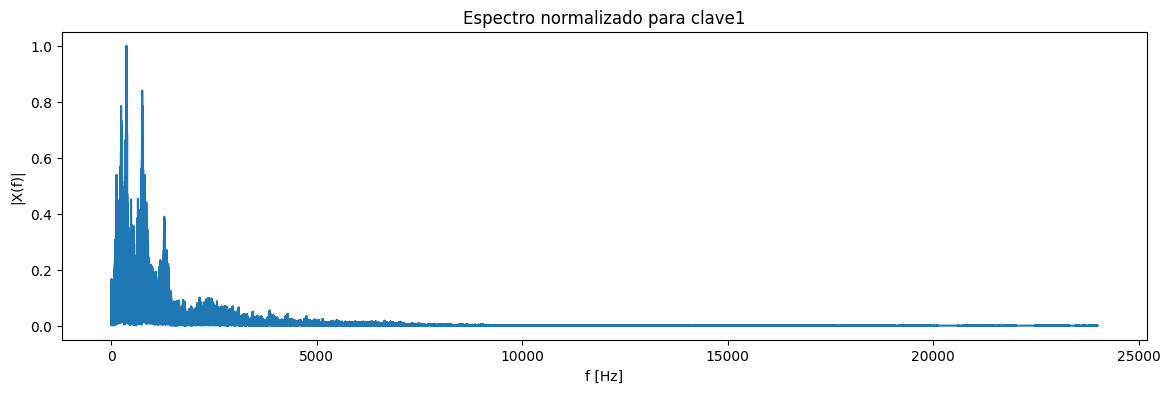

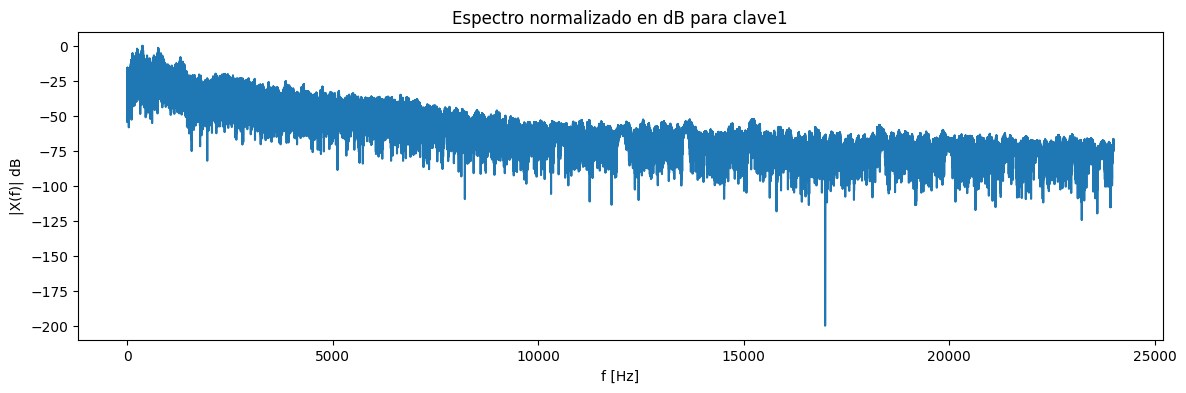

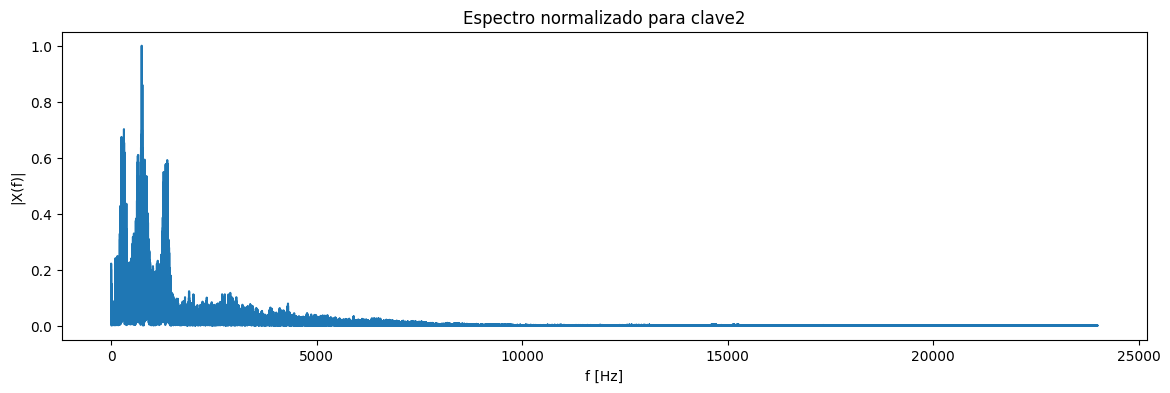

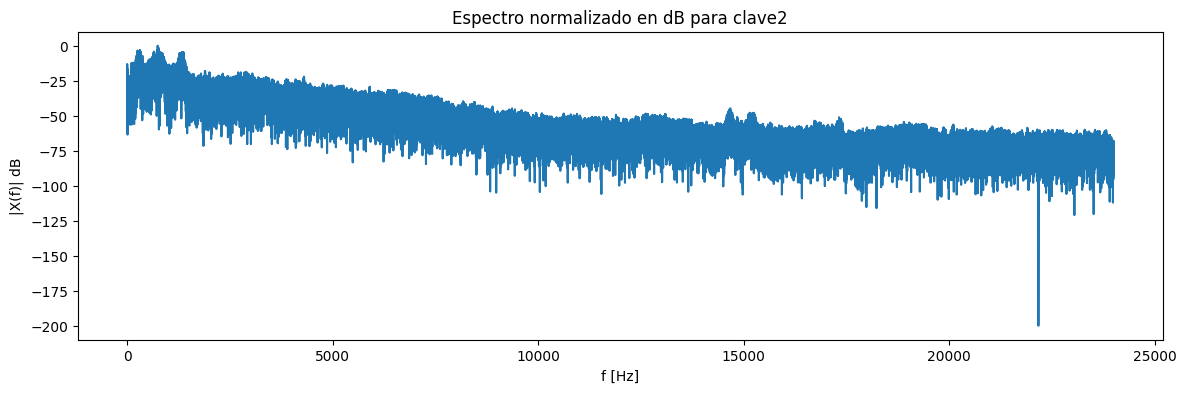

In [21]:
# Diccionario para almacenar los espectros normalizados de cada señal
fourier_signals_normalized = {}

# Iteramos sobre cada entrada en fourier_signals
for key, data in fourier_signals.items():
    # Extraemos la FFT y las frecuencias
    fft_signal = data["fft"]
    frequencies = data["frequencies"]

    # Seleccionar solo las frecuencias positivas
    idx_positive = frequencies >= 0
    vf = frequencies[idx_positive]
    # Calculamos el espectro de magnitud para las frecuencias positivas
    Xw = np.abs(fft_signal[idx_positive])

    # Normalización del espectro entre 0 y 1
    sca = MinMaxScaler()
    # MinMaxScaler requiere una matriz 2D, por ello se realiza el reshape
    Xw_reshaped = Xw.reshape(-1, 1)
    Xw_norm = sca.fit_transform(Xw_reshaped).flatten()

    # Almacenamos el espectro normalizado y las frecuencias en un nuevo diccionario
    fourier_signals_normalized[key] = {
        "normalized_spectrum": Xw_norm,
        "frequencies": vf
    }

    # Graficar el espectro normalizado (magnitud)
    plt.figure(figsize=(14, 4))
    plt.plot(vf, Xw_norm)
    plt.xlabel('f [Hz]')
    plt.ylabel('|X(f)|')
    plt.title(f"Espectro normalizado para {key}")
    plt.show()

    # Graficar el espectro en dB (se suma 1e-10 para evitar problemas con el logaritmo de cero)
    plt.figure(figsize=(14, 4))
    plt.plot(vf, 20 * np.log10(Xw_norm + 1e-10))
    plt.xlabel('f [Hz]')
    plt.ylabel('|X(f)| dB')
    plt.title(f"Espectro normalizado en dB para {key}")
    plt.show()


In [22]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cosine

# Función para procesar un audio: carga, eliminación de silencios, FFT y normalización
def obtener_espectro_normalizado(filename, top_db=35):
    # Cargar el audio conservando la tasa de muestreo original
    audio, sr = librosa.load(filename, sr=None)
    # Eliminar silencios (se usan los intervalos no silenciosos)
    intervals = librosa.effects.split(audio, top_db=top_db)
    audio_no_silence = np.concatenate([audio[start:end] for start, end in intervals])

    # Calcular la FFT de la señal sin silencios y obtener la mitad positiva
    fft_audio = np.fft.fft(audio_no_silence)
    fft_audio = np.abs(fft_audio[:len(fft_audio)//2])

    # Normalizar el espectro entre 0 y 1
    scaler = MinMaxScaler()
    fft_audio_norm = scaler.fit_transform(fft_audio.reshape(-1,1)).flatten()

    return fft_audio_norm, sr

# Procesar los audios de referencia (clave1 y clave2)
spec_ref1, sr1 = obtener_espectro_normalizado("clave1.wav")
spec_ref2, sr2 = obtener_espectro_normalizado("clave2.wav")

# Asegurarse de comparar vectores de igual longitud (se toma el mínimo de ambas longitudes)
min_len_refs = min(len(spec_ref1), len(spec_ref2))
spec_ref1 = spec_ref1[:min_len_refs]
spec_ref2 = spec_ref2[:min_len_refs]

# Calcular la distancia de coseno entre las dos muestras de referencia
d_ref = cosine(spec_ref1, spec_ref2)
print(f"Distancia de referencia (clave1 vs clave2): {d_ref:.4f}")

# Definir un margen de tolerancia para el umbral.
# Estos valores se pueden ajustar según pruebas y experimentación.
tolerancia = 0.05
umbral_min = d_ref - tolerancia
umbral_max = d_ref + tolerancia
print(f"Umbral de aceptación: [{umbral_min:.4f}, {umbral_max:.4f}]")

# Función para verificar acceso con una nueva muestra de voz
def verificar_acceso(nuevo_audio_filename, ref1, ref2, umbral_min, umbral_max, top_db=35):
    # Procesar el nuevo audio para obtener su espectro normalizado
    spec_nuevo, sr_nuevo = obtener_espectro_normalizado(nuevo_audio_filename, top_db=top_db)

    # Para comparar, recortar los vectores al mínimo común de longitudes entre nuevo y referencias
    min_len = min(len(spec_nuevo), len(ref1), len(ref2))
    spec_nuevo = spec_nuevo[:min_len]
    ref1_cut = ref1[:min_len]
    ref2_cut = ref2[:min_len]

    # Calcular la distancia del coseno entre la nueva muestra y cada referencia
    d1 = cosine(spec_nuevo, ref1_cut)
    d2 = cosine(spec_nuevo, ref2_cut)

    print(f"Distancia con clave1: {d1:.4f}")
    print(f"Distancia con clave2: {d2:.4f}")

    # Si alguna de las distancias está dentro del rango de aceptación, se autoriza
    if umbral_min <= d1 <= umbral_max or umbral_min <= d2 <= umbral_max:
        print("Acceso autorizado.")
    else:
        print("Acceso denegado.")




Distancia de referencia (clave1 vs clave2): 0.3551
Umbral de aceptación: [0.3051, 0.4051]


In [23]:
from google.colab import files

# Abre un diálogo para subir el archivo
uploaded = files.upload()

# Opcional: Si el archivo subido tiene otro nombre, renómbralo a "nuevo.wav"
import os
for filename in uploaded.keys():
    if filename != "nuevo.wav":
        os.rename(filename, "nuevo.wav")


Saving Grabación (4).m4a to Grabación (4).m4a


In [24]:
# Ejemplo de uso:
# Supongamos que tenemos un nuevo audio "nuevo.wav" que contiene la palabra clave
verificar_acceso("nuevo.wav", spec_ref1, spec_ref2, umbral_min, umbral_max)



<ipython-input-22-dcd61bb7da01>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(filename, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Distancia con clave1: 0.6128
Distancia con clave2: 0.6785
Acceso denegado.


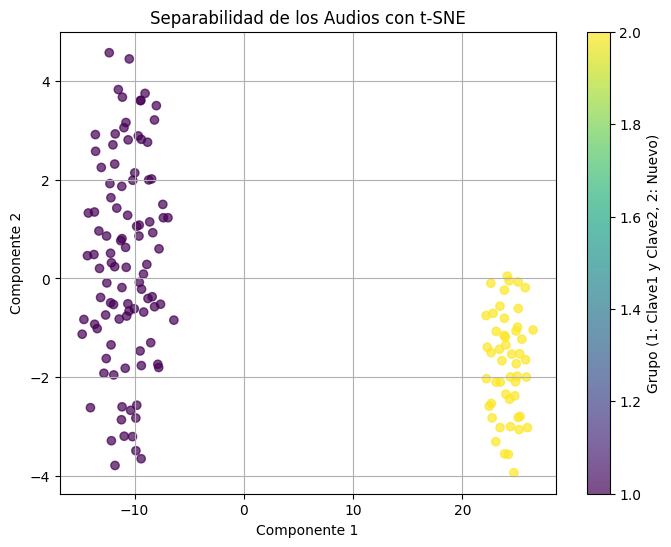

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import librosa

# Simulación de características extraídas de clave1, clave2 y nuevo audio
# En un caso real, se deben extraer MFCCs o espectrogramas de los audios originales

# Generamos datos sintéticos para representar las características de los audios
np.random.seed(42)
clave1_features = np.random.normal(loc=0, scale=1, size=(50, 13))  # 50 segmentos de clave1
clave2_features = np.random.normal(loc=0.2, scale=1, size=(50, 13))  # 50 segmentos de clave2
nuevo_audio_features = np.random.normal(loc=3, scale=1, size=(50, 13))  # 50 segmentos del nuevo audio

# Unir los datos y normalizarlos
X = np.vstack([clave1_features, clave2_features, nuevo_audio_features])
y = np.array([1] * 50 + [1] * 50 + [2] * 50)  # 1 para clave1 y clave2 (misma persona), 2 para el nuevo audio

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

# Graficar los resultados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(label="Grupo (1: Clave1 y Clave2, 2: Nuevo)")
plt.title("Separabilidad de los Audios con t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()
